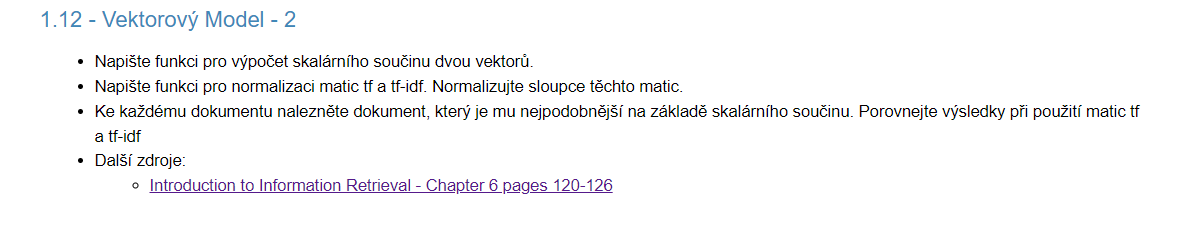

In [7]:
import numpy as np
import os
import json
import math
from collections import Counter
import pandas as pd

In [8]:
path = '../5/stemmed/gutenberg/'

In [9]:
inverted_index = '../6/inverted_index.json'

In [10]:
index = None

In [11]:
with open(inverted_index, 'r') as file:
    index = json.load(file)

In [12]:
vocabulary = list(index.keys())

In [13]:
files = os.listdir(path)
number_of_documents = len(files)

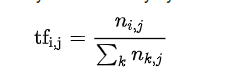

## Výpočet TF složky ze cesty, která je vstupem do metody

In [14]:
def get_tf_from_path(path):
    docId2tf = {}
    for docId, file_name in enumerate(os.listdir(path)):
        if '.txt' not in file_name:
            continue
        
        file_path = os.path.join(path, file_name)

        content = ''
        
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        words = content.split(' ')
        c = Counter(words)
        docId2tf[docId] = dict(c)
        
    return docId2tf

In [15]:
tf = get_tf_from_path(path)

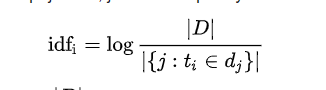

In [18]:
number_of_documents

90

## Výpočet IDF složky z invertovaného indexu, který obsahuje všechny slova a k nim v kolika dokumentech se vyskytuje

In [19]:
def get_idf(inverted_index):
    idf = {}
    print(number_of_documents)
    
    for k, v in inverted_index.items():
        idf[k] = math.log(number_of_documents / len(v))
    
    return idf

In [20]:
idf = get_idf(index)

90


In [21]:
def create_matrix(tf, idf):
    terms = list(idf.keys())
    columns = list(tf.keys())
    
    tf_df = pd.DataFrame(index=terms, columns=columns) 
    idf_df = pd.DataFrame(index=terms)
        
    idf_df['Value'] = 0
    for k, v in idf.items():
        idf_df.loc[k, 'Value'] = v
        
    tf_idf_df = pd.DataFrame(index=terms, columns=columns)
    
    for docId, values in tf.items():
        tf_df.loc[:, docId] = 0
        for term, value in values.items():
            tf_df.loc[term, docId] = value
            
    return tf_df, idf_df

In [22]:
tf_df, idf_df = create_matrix(tf, idf)

In [23]:
def get_fallback(df, k):
    try:
        return df.loc[k, 'Value']
    except:
        return 0

In [24]:
def create_tf_idf(tf_df, idf_tf):          
    terms = list(tf_df.index)
    tf_idf_df = pd.DataFrame(index=terms)
    
    for docId in tf_df.columns:
        for k in terms:
            tf_idf_df.loc[k, docId] = tf_df.loc[k, docId] * get_fallback(idf_df, k)
    
    return tf_idf_df

In [25]:
tf_idf_df = create_tf_idf(tf_df, idf_df)

# Values

In [26]:
TF_MATRIX = tf_df

In [27]:
TF_IDF_MATRIX = tf_idf_df

In [28]:
TF_MATRIX.head()

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
note,9.0,4.0,217.0,24.0,6.0,43.0,45.0,2.0,40.0,9.0,...,25,58,16,5,24,1,1,4,4,20
file,21.0,3.0,31.0,5.0,2.0,6.0,6.0,4.0,3.0,4.0,...,9,8,4,4,9,6,5,4,4,8
combin,4.0,0.0,18.0,0.0,4.0,6.0,5.0,0.0,4.0,2.0,...,15,10,5,4,3,0,0,1,1,5
first,25.0,453.0,1376.0,40.0,58.0,135.0,123.0,51.0,159.0,104.0,...,101,109,109,108,124,22,21,39,36,118
two,25.0,837.0,775.0,89.0,108.0,211.0,169.0,38.0,188.0,41.0,...,130,202,184,38,150,27,40,20,76,231


In [29]:
TF_IDF_MATRIX.head()

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
note,0.620936,0.275971,14.971453,1.655829,0.413957,2.966693,3.104679,0.137986,2.759715,0.620936,...,1.724822,4.001587,1.103886,0.344964,1.655829,0.068993,0.068993,0.275971,0.275971,1.379857
file,0.234639,0.033520,0.346372,0.055867,0.022347,0.067040,0.067040,0.044693,0.033520,0.044693,...,0.100560,0.089386,0.044693,0.044693,0.100560,0.067040,0.055867,0.044693,0.044693,0.089386
combin,1.363706,0.000000,6.136679,0.000000,1.363706,2.045560,1.704633,0.000000,1.363706,0.681853,...,5.113899,3.409266,1.704633,1.363706,1.022780,0.000000,0.000000,0.340927,0.340927,1.704633
first,0.561821,10.180204,30.922650,0.898914,1.303426,3.033836,2.764161,1.146116,3.573184,2.337177,...,2.269758,2.449541,2.449541,2.427068,2.786634,0.494403,0.471930,0.876441,0.809023,2.651797
two,0.561821,18.809780,17.416463,2.000084,2.427068,4.741773,3.797913,0.853969,4.224897,0.921387,...,2.921471,4.539517,4.135005,0.853969,3.370928,0.606767,0.898914,0.449457,1.707937,5.191230


## Napište funkci pro výpočet skalárního součinu dvou vektorů.

In [33]:
def dot(a, b):
    return np.dot(a, b)

## Kosínova podobnost

In [34]:
def similarity(a, b):
    return (dot(a, b)) / (np.sqrt(np.sum(dot(a, a))) * np.sqrt(np.sum(dot(b, b))))

## Napište funkci pro normalizaci matic tf a tf-idf. Normalizujte sloupce těchto matic.

### Normovat vektor

In [155]:
from numpy import linalg

In [172]:
def myfunc(a, b):
    if b == 0:
        return 0
    else:
        #print(a / b, a, b)
        return a / b

In [173]:
vfunc = np.vectorize(myfunc)

In [178]:
def normalize(df):
    copy = df.copy()
    for docId in df.columns:
        vector = df.loc[:, docId].values
        vector = np.nan_to_num(vector, nan=0)
        norm = linalg.norm(vector)
        new_vector = vfunc(vector, norm)
        copy.loc[:, docId] = new_vector
    return copy

In [179]:
normalize(TF_MATRIX).head()

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
note,0.017367,0.000154,0.011140,0.020903,0.004188,0.016667,0.021073,0.002325,0.015276,0.004594,...,0.014365,0.016968,0.008516,0.004329,0.011669,0.001127,0.001558,0.006297,0.003381,0.008121
file,0.040523,0.000115,0.001591,0.004355,0.001396,0.002326,0.002810,0.004651,0.001146,0.002042,...,0.005171,0.002340,0.002129,0.003464,0.004376,0.006761,0.007791,0.006297,0.003381,0.003248
combin,0.007719,0.000000,0.000924,0.000000,0.002792,0.002326,0.002341,0.000000,0.001528,0.001021,...,0.008619,0.002926,0.002661,0.003464,0.001459,0.000000,0.000000,0.001574,0.000845,0.002030
first,0.048242,0.017388,0.070638,0.034839,0.040482,0.052327,0.057599,0.059298,0.060724,0.053084,...,0.058035,0.031889,0.058017,0.093515,0.060292,0.024792,0.032721,0.061398,0.030425,0.047912
two,0.048242,0.032128,0.039785,0.077516,0.075381,0.081785,0.079140,0.044183,0.071799,0.020927,...,0.074698,0.059097,0.097937,0.032904,0.072934,0.030426,0.062326,0.031486,0.064231,0.093794


In [134]:
TF_MATRIX.head()

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
note,9.0,4.0,217.0,24.0,6.0,43.0,45.0,2.0,40.0,9.0,...,25,58,16,5,24,1,1,4,4,20
file,21.0,3.0,31.0,5.0,2.0,6.0,6.0,4.0,3.0,4.0,...,9,8,4,4,9,6,5,4,4,8
combin,4.0,0.0,18.0,0.0,4.0,6.0,5.0,0.0,4.0,2.0,...,15,10,5,4,3,0,0,1,1,5
first,25.0,453.0,1376.0,40.0,58.0,135.0,123.0,51.0,159.0,104.0,...,101,109,109,108,124,22,21,39,36,118
two,25.0,837.0,775.0,89.0,108.0,211.0,169.0,38.0,188.0,41.0,...,130,202,184,38,150,27,40,20,76,231


## Ke každému dokumentu nalezněte dokument, který je mu nejpodobnější na základě skalárního součinu. Porovnejte výsledky při použití matic tf a tf-idf

In [82]:
def find_closest(doc, n):
    res = {} #docId : { (docId, sim ) }
    
    
    
    
    
    
    
    print(doc, n)

In [116]:
def create_sim(matrix, df):
    res = {}
    all_ids = df.columns
    for docId in all_ids:
        tranformedDocId = docId - 1 
        others = list(filter(lambda x: x != docId, all_ids))
        a_vector = matrix[:, tranformedDocId]
        for otherDocId in others:
            transformedOtherDocId = otherDocId - 1
            b_vector = matrix[:, transformedOtherDocId]
            list_value = res.get(docId, [])
            value = (otherDocId, dot(a_vector, b_vector))
            list_value.append(value)
            res[docId] = list_value
        res[docId] = sorted(res[docId], key=lambda x: x[1], reverse=True)
    return res

In [118]:
create_sim(np.nan_to_num(TF_MATRIX, nan=0), TF_MATRIX);

In [95]:
TF_MATRIX.head()

,1,2,3,4,5,6,7,8,9,10,...,80,81,82,83,84,85,86,87,88,89
note,9.0,4.0,217.0,24.0,6.0,43.0,45.0,2.0,40.0,9.0,...,25,58,16,5,24,1,1,4,4,20
file,21.0,3.0,31.0,5.0,2.0,6.0,6.0,4.0,3.0,4.0,...,9,8,4,4,9,6,5,4,4,8
combin,4.0,0.0,18.0,0.0,4.0,6.0,5.0,0.0,4.0,2.0,...,15,10,5,4,3,0,0,1,1,5
first,25.0,453.0,1376.0,40.0,58.0,135.0,123.0,51.0,159.0,104.0,...,101,109,109,108,124,22,21,39,36,118
two,25.0,837.0,775.0,89.0,108.0,211.0,169.0,38.0,188.0,41.0,...,130,202,184,38,150,27,40,20,76,231


In [89]:
np.nan_to_num(TF_MATRIX.loc[:, 1], nan=0)

array([ 9., 21.,  4., ..., 18.,  0.,  0.])

In [90]:
sorted([np.nan, 5, 15, 10])

[nan, 5, 10, 15]

# Raw

## TF

In [121]:
tf_sim = create_sim(np.nan_to_num(TF_MATRIX, nan=0), TF_MATRIX);

## TF-IDF

In [122]:
tf_idf_sim = create_sim(np.nan_to_num(TF_IDF_MATRIX, nan=0), TF_IDF_MATRIX);

# Normalized

In [180]:
TF_NORMALIZED = normalize(TF_MATRIX)

In [181]:
TF_IDF_NORMALIZED = normalize(TF_IDF_MATRIX)

## TF normalized

In [182]:
tf_normalized_sim = create_sim(np.nan_to_num(TF_NORMALIZED, nan=0), TF_NORMALIZED);

## TF-IDF normalized

In [183]:
tf_idf_normalized_sim = create_sim(np.nan_to_num(TF_IDF_NORMALIZED, nan=0), TF_IDF_NORMALIZED);

# Test of implementation

In [186]:
engines = {
    'tf': tf_sim,
    'tf-idf': tf_idf_sim,
    'tf_normalized': tf_normalized_sim,
    'tf-idf_normalized': tf_idf_normalized_sim,
}

In [189]:
def find_closest_for(docId, n, engines):
    res = {}
    for k, v in engines.items():
        res[k] = v[docId][0:n]
    return res

In [195]:
def print_res(res):
    for k, v in res.items():
        docIds, sims = zip(*v)
        print(f'For {k} \n\tids -> {docIds} \n\tsim -> {sims}')

In [196]:
res = find_closest_for(1, 10, engines)
print_res(res)

For tf 
	ids -> (2, 3, 46, 25, 53, 32, 18, 37, 57, 81) 
	sim -> (4995163.0, 3720501.0, 1641053.0, 1626624.0, 1495610.0, 1021635.0, 799614.0, 669311.0, 628904.0, 613080.0)
For tf-idf 
	ids -> (53, 2, 3, 46, 25, 57, 18, 81, 32, 28) 
	sim -> (141769.62419833327, 134227.33197707435, 86505.43629779891, 44398.79181784341, 29017.236463659494, 23484.40731761576, 22964.104010508992, 14116.963504543675, 13288.319093060269, 10128.932676253457)
For tf_normalized 
	ids -> (53, 33, 75, 20, 74, 34, 58, 65, 29, 83) 
	sim -> (0.6801586930808439, 0.6142147427853959, 0.6046894178878042, 0.4588602746637128, 0.44266795724720354, 0.4375991452557466, 0.43515635859172175, 0.42415553068746403, 0.42062981039257785, 0.41890400263071714)
For tf-idf_normalized 
	ids -> (53, 33, 75, 74, 60, 58, 18, 2, 84, 13) 
	sim -> (0.358551966488137, 0.14863413441777634, 0.12617924756034582, 0.05128924099046932, 0.050293434008058455, 0.04296077122891437, 0.041503446392446554, 0.03751539385900348, 0.034763574591553964, 0.0293726